In [0]:
#https://jaehyeongan.github.io/2019/03/26/KERAS-FUNCTIONAL-API-MULTI-INPUT-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0/

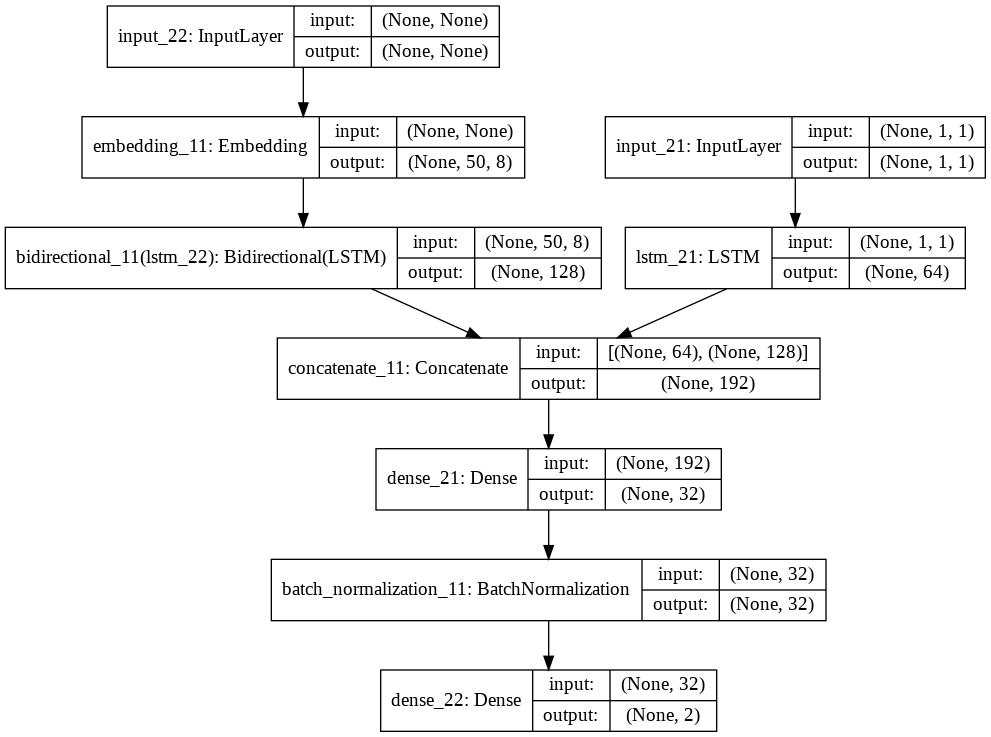

In [16]:
from keras.layers import Input, Dense
from keras.models import Model

from keras import models, layers

timesteps = 1
columns_size = 1
max_words = 1000	# 사용할 최대 단어 수 
max_len = 50		# 단어의 길이

def multi_input_lstm_embedding_model(timesteps, columns_size, max_words, max_len):
	# lstm model
	lstm_input = layers.Input(shape=(timesteps, columns_size))
	lstm_out = layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)(lstm_input)

	lstm_model = Model(inputs=lstm_input, outputs=lstm_out)

	# embedding model 
	embed_input = layers.Input(shape=(None,))
	embed_out = layers.Embedding(max_words, 8, input_length=max_len)(embed_input)
	embed_out = layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3))(embed_out)

	embed_model = Model(inputs=embed_input, outputs=embed_out)

	# concatenate
	concatenated = layers.concatenate([lstm_model.output, embed_model.output])
	concatenated = layers.Dense(32, activation='relu')(concatenated)
	concatenated = layers.BatchNormalization()(concatenated)
	concat_out = layers.Dense(2, activation='sigmoid')(concatenated)

	concat_model = models.Model([lstm_input, embed_input], concat_out)

	return concat_model

## model define
concat_model = multi_input_lstm_embedding_model(timesteps, columns_size, max_words, max_len)
concat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.utils import plot_model
plot_model(concat_model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [0]:
df_label_train = ''
pad_train = ''
target_train = ''
callbacks_list = ''
sequence_test = ''
pad_test = ''
target_test = ''

# model fit
concat_model.fit([df_label_train, pad_train], target_train,
				epochs=7, batch_size=32,
				callbacks=callbacks_list,
				validation_data=([sequence_test, pad_test], target_test),
				shuffle=False)	# because of time-series